<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/Kernel_principal_component_analysis_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel principal Component Analysis in sklearn

### Loading the Dataset

In [33]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
RAND=123

# import some data to play with
iris = datasets.load_iris()
X = iris.data

y = iris.target


X=np.hstack((X,10*np.random.random((y.shape[0], 3))))
X[:,6]=X[:,6]*X[:,0] +5*np.random.random((y.shape[0]))


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RAND)
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


Baseline accuracy = 

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
nb_model = KNeighborsClassifier(n_neighbors=3, p=1)
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
scores_base=accuracy_score(y_test,y_pred)
print("Baseline accuracy = ", scores_base)

Baseline accuracy =  0.868421052631579


##  KernelPCA in scikit-learn
Kernel used for PCA.

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’, ‘precomputed’}, 
default=’linear’


In [35]:
from sklearn.decomposition import KernelPCA
sklearn_pca = KernelPCA(kernel='rbf', n_components=2)
sklearn_pca.fit(X_train)
X_train_pca = sklearn_pca.transform(X_train)
X_test_pca  = sklearn_pca.transform(X_test)


In [36]:
nb_model.fit(X_train_pca, y_train)
y_pred = nb_model.predict(X_test_pca)
scores_base=accuracy_score(y_test,y_pred)
print("RBF-PCA features accuracy = ", scores_base)

RBF-PCA features accuracy =  0.8421052631578947


In [37]:

sklearn_pca = KernelPCA(kernel="poly", n_components=2)
sklearn_pca.fit(X_train)
X_train_pca = sklearn_pca.transform(X_train)
X_test_pca  = sklearn_pca.transform(X_test)


In [38]:
nb_model.fit(X_train_pca, y_train)
y_pred = nb_model.predict(X_test_pca)
scores_base=accuracy_score(y_test,y_pred)
print("poly-PCA features accuracy = ", scores_base)

poly-PCA features accuracy =  0.868421052631579


## Loading scikit-learn's MNIST Hand-Written Dataset

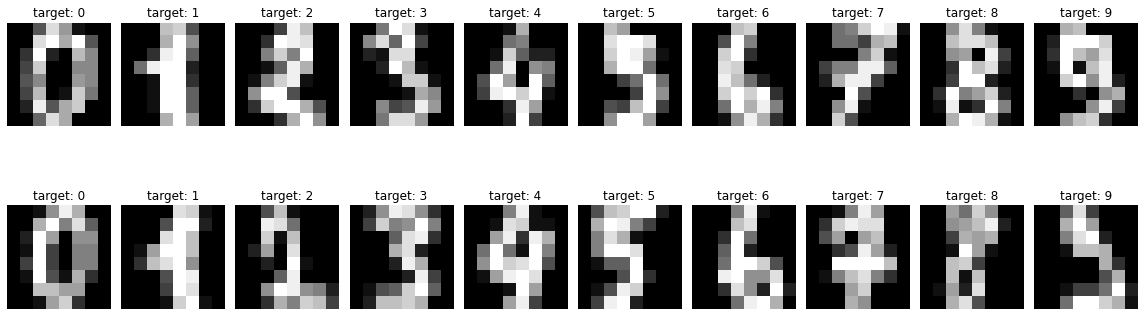

In [39]:
from sklearn.datasets import load_digits
mnist = load_digits()
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

In [40]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RAND)
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
print(X.shape)

(1797, 64)


In [41]:
nb_model = KNeighborsClassifier(n_neighbors=3, p=1)
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
scores_base=accuracy_score(y_test,y_pred)
print("Digits Baseline accuracy = ", scores_base)

Digits Baseline accuracy =  0.9644444444444444


In [75]:

sklearn_pca = KernelPCA(kernel="linear", n_components=2)
sklearn_pca.fit(X_train)
X_train_pca = sklearn_pca.transform(X_train)
X_test_pca  = sklearn_pca.transform(X_test)
nb_model.fit(X_train_pca, y_train)
y_pred = nb_model.predict(X_test_pca)
scores_base=accuracy_score(y_test,y_pred)
print("Digits poly-PCA features accuracy = ", scores_base)

Digits poly-PCA features accuracy =  0.5311111111111111


(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 (-5.1632908631140015, 6.577748059921381),
 (-4.777472838579515, 5.565887185225581))

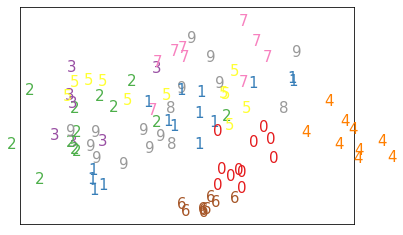

In [76]:
for i in range(np.min([X_train_pca.shape[0], 100])):
        plt.text(X_train_pca[i, 0], X_train_pca[i, 1], str(y_train[i]), 
                 color=plt.cm.Set1(y_train[i]), 
                 fontdict={'size': 15})
#plt.autoscale(enable=True, axis='both', tight=None)       
plt.xticks([]), plt.yticks([]), plt.ylim([np.min(X_train_pca[:100, 0]),np.max(X_train_pca[:100, 0])]), plt.xlim([np.min(X_train_pca[:100, 1]),np.max(X_train_pca[:100, 1])])        

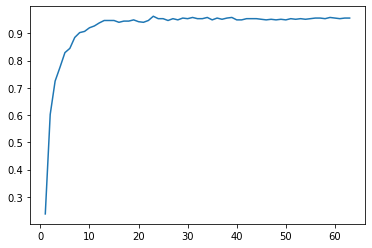

In [48]:
scores=[]
for i in range(1,64):
  sklearn_pca = KernelPCA(kernel="rbf",n_components=i)
  sklearn_pca.fit(X_train)
  X_train_pca = sklearn_pca.transform(X_train)
  X_test_pca  = sklearn_pca.transform(X_test)
  nb_model.fit(X_train_pca, y_train)
  y_pred = nb_model.predict(X_test_pca)
  scores_base=accuracy_score(y_test,y_pred)
  scores.append(scores_base)

plt.plot(range(1,64), scores)